<a href="https://colab.research.google.com/github/dave-heslop74/EMSC2010-W3-P1/blob/main/EMSC2010_W3_P1_NB1_uXXXXXXX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMSC2010_W3_P1_NB1
---

*   Class: EMSC2010
*   Week: 3
*   Session: Practical 1

---

From GitHub, you can open this notebook in Google Colab using the 'Open in Colab' button. Then:

1. Change the notebook name to include your U-number (e.g EMSC2010_W3_P1_NB1_uXXXXXXX.ipynb)
2. Save to Google Drive (*File* >>> *Save a copy in Drive*)

Any edits you make will be saved in your Google Drive. To save your editted version to GitHub

3. Commit to GitHub (*File* >>> *Save a copy in GitHub*)
4. Select the repository for your commit (same as your original repository)
5. Give a brief commit message (e.g. 'Commit including adjustment to labels')
6. Check your GitHub repository, a copy of your notebook should be there.

---

Because Google Drive is saving your work and the work of your collaborators automatically, you don't need to commit all minor edits to GitHub. Rather commit when you want to archive a version of your notebook because you have completed a substantial task.

# Plotting measurements of Earth's magnetic field

In this notebook we'll plot the magnetic field data you collected using Phyphox. This will involve importing the data from your Google Sheet and then plotting it. As an extension to our previous notebooks, you'll be using pre-existing Python packages for specific tasks. This will include ```matplotlib```, which is a package commonly used for plotting.

## Setting up Colab

In some cases, we need to install a package to link the notebook and Google Drive.

This may not be necessary, but we'll do it to be on the same side.

In [17]:
!pip install gspread google-auth

## Install Python packages

Python packages are directories containing related code modules (single .py files) and other sub-packages, bundled together for easy reuse and organization of large projects.  

We can used the ```import``` command to read packages into the memory and give the package an abbreviated name.

If we don't want to import the whole package, we can use the ```from``` and ```import``` commands in combination.

In [18]:
import pandas as pd #used to read and clean data
import matplotlib.pyplot as plt #used for data plotting
from google.colab import auth #imports the Colab authentication module
import gspread #enables interaction with Google Sheets
from google.auth import default #use for authentication

## Read in the data from your Google Sheet

Authentication to allow the notebook to interact with files in your Google Drive (don't worry about the specifics)

In [19]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

We now need to provide a share link to the Google Sheet data file and the name of the worksheet that contains the data.

In [20]:
spreadsheet_url = 'https://docs.google.com/spreadsheets/d/1no7Qnab_NX5CwK-o8eaviQy3VjflDiWOnjMAaitk514/edit?usp=sharing' # Replace with your shared Google Sheet URL
worksheet_name = 'Sheet1' #name of your worksheet containing the data

The worksheet information will now be read into ```worksheet```. We can then extract the data and convert it into a ```pandas``` dataframe called ```df```

Finally, we show the top of the dataframe including the header information

In [21]:
worksheet = gc.open_by_url(spreadsheet_url).worksheet(worksheet_name) #opens a link to the worksheet
data = worksheet.get_all_values() #get all the data from the worksheet
df = pd.DataFrame(data[1:], columns=data[0]) #read the data into a dataframe assuming the first row is the header information
df = df.apply(pd.to_numeric, errors="coerce") #sometimes the data is read as text, so make sure it is numbers
df.head() #show the dataframe header information

,Time (s),X (µT),Y (µT),Z (µT)
0,0.006458,12.562195,41.111656,42.492218
1,0.016438,12.318146,40.978592,42.471069
2,0.026418,12.175110,40.917709,42.410644
3,0.036397,11.584442,40.132168,43.118301
4,0.046377,11.538116,39.742455,43.753098


## Plot the data
Now that we have the data stored in ```df``` we can plot it. First, we'll just plot the data in the column called ```Time (s)``` against ```Z (µT)```.

We'll be using ```matplotlib``` functions, which we define with the package name abbreviation ```plt```.

First we'll make a new set of axes and then plot the data on those axes. We can also make adjustments to the axes to control the look of the plot.



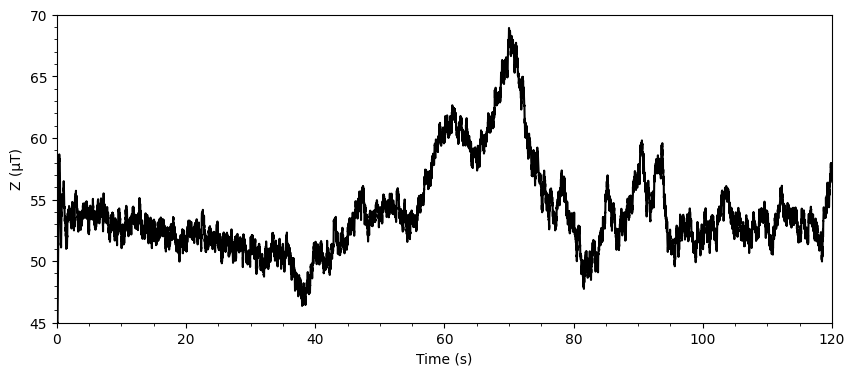

In [22]:
fig, ax = plt.subplots(figsize=(10, 4)) #make axes (called ax) 10 units wide and 4 units high
ax.plot(df['Time (s)'],df['Z (µT)'],'k') #plot time vs. Z on ax as a black ('k') line
ax.set_xlabel('Time (s)') #text for the x-axis label
ax.set_ylabel('Z (µT)') #text for the y-axis label
ax.set_xlim([0,120]) #interval for the x-axis
ax.set_ylim([45,70]) #interval for the y-axis
ax.minorticks_on() #show the minor ticks

Now we'll plot X, Y, and Z with different colours all in the same axes.

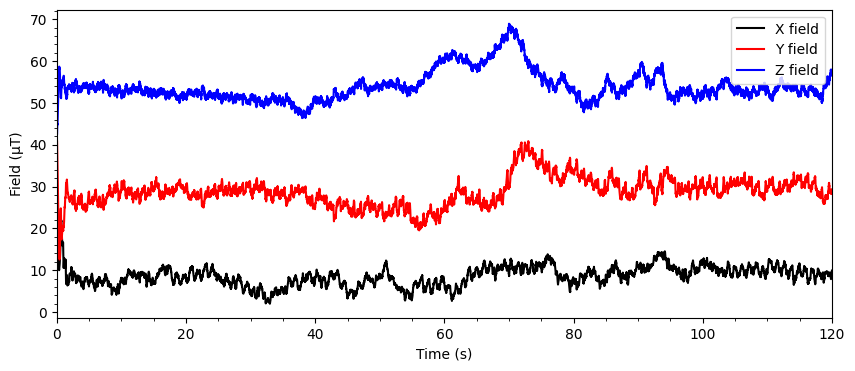

In [23]:
fig, ax = plt.subplots(figsize=(10, 4)) #make axes (called ax) 10 units wide and 4 units high
ax.plot(df['Time (s)'],df['X (µT)'],'k',label='X field') #plot time vs. X as a black ('k') line, add a label name for the line
ax.plot(df['Time (s)'],df['Y (µT)'],'r',label='Y field') #plot time vs. Y as a red ('r') line, add a label name for the line
ax.plot(df['Time (s)'],df['Z (µT)'],'b',label='Z field') #plot time vs. Z as a blue ('k') line, add a label name for the line
ax.set_xlabel('Time (s)') #text for the x-axis label
ax.set_ylabel('Field (µT)') #text for the y-axis label
ax.set_xlim([0,120]) #interval for the x-axis
ax.minorticks_on() #show the minor ticks
ax.legend() #show the legend with the labels given above

We can also plot X, Y, and Z on different aligned subplots.

In this case ```ax``` contains 3 sets of axes and we use a number to define which axes we want to work with. Specifically:


*   ```ax[0]``` upper set of axes
*   ```ax[1]``` middle set of axes
*   ```ax[2]``` bottom set of axes

We'll also use the option ```sharex=True```, so that the x-axes are the same in all the plots.

Text(0.5, 0, 'Time (s)')

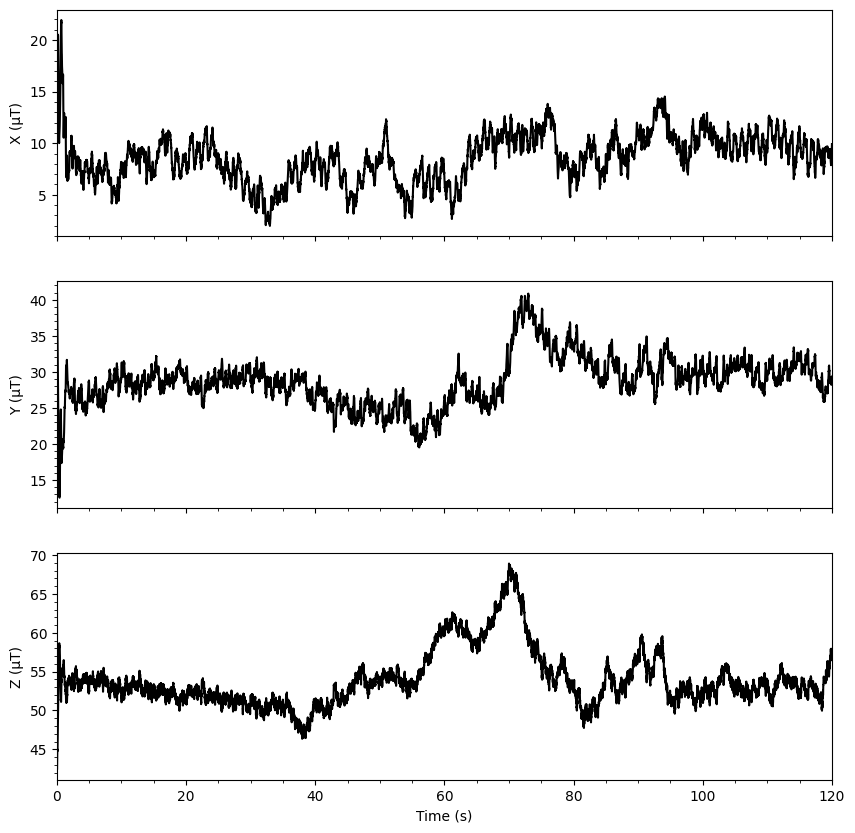

In [24]:
fig, ax = plt.subplots(3,1,figsize=(10, 10),sharex=True) #make 3 set axes in a column

ax[0].plot(df['Time (s)'],df['X (µT)'],'k') #plot time vs. X in the first axes
ax[0].set_ylabel('X (µT)') #text for the y-axis label
ax[0].minorticks_on() #show the minor ticks

ax[1].plot(df['Time (s)'],df['Y (µT)'],'k') #plot time vs. Y in the second axes
ax[1].set_ylabel('Y (µT)') #text for the y-axis label
ax[1].minorticks_on() #text for the y-axis label

ax[2].plot(df['Time (s)'],df['Z (µT)'],'k') #plot time vs. Z in the second axes
ax[2].set_ylabel('Z (µT)') #text for the y-axis label
ax[2].minorticks_on() #text for the y-axis label

ax[2].set_xlim([0,120]) #interval for the x-axis (will be the same for all axes)
ax[2].set_xlabel('Time (s)') #text for the x-axis label